In [1]:
import os
import glob
import pandas as pd
import re

import matplotlib.pyplot as plt

import scipy as sp
import scipy.stats
import numpy as np

extension = 'csv'
file_names = [i for i in glob.glob('*.csv')]
run_time = pd.DataFrame(index=("PCA","MDS","Isomap","Spectral embedding","LLE","HLLE","LTSA","t-SNE"))

for file_name in file_names:
    p = re.compile('(.*)-ctime.csv')
    student_name = p.findall(file_name)[0]
    student_run_time = pd.read_csv(file_name, header=None)
    student_run_time.index = run_time.index
    run_time[[student_name]] = student_run_time
run_time

,christine,milan,milanvojnovic
PCA,2.022393,1.812782,1.784106
MDS,7.200593,6.238862,7.856588
Isomap,2.887716,2.803494,2.774442
Spectral embedding,0.215782,0.228818,0.240174
LLE,2.219689,2.142454,2.131869
HLLE,2.731645,2.514570,2.519522
LTSA,2.544251,2.449481,2.400282
t-SNE,7.134806,7.190351,7.147340


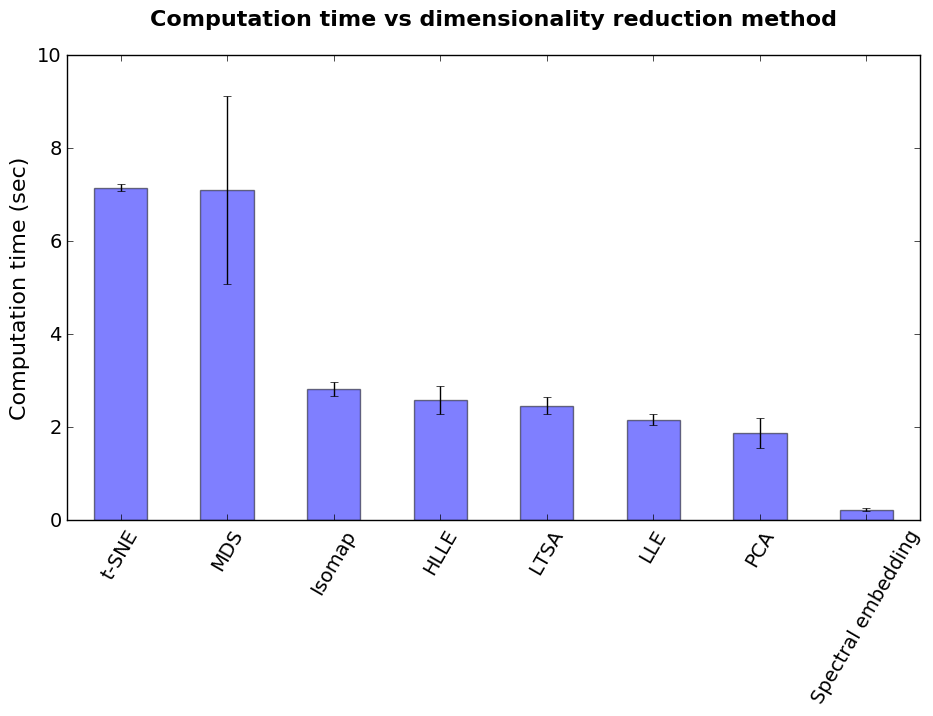

In [2]:
#gp = df4.groupby(level=('letter', 'word'))
run_time_stat = pd.DataFrame(index=run_time.index)
run_time_stat['mean'] = run_time.mean(axis=1)
run_time_stat['sd'] = run_time.std(axis=1)
confidence = 0.95
run_time_stat['cv'] = pd.DataFrame(run_time.std(axis=1) * sp.stats.t._ppf((1+confidence)/2., run_time.shape[1]-1)) / np.sqrt(run_time.shape[1])
run_time_stat = run_time_stat.sort_values(by=['mean'],ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(11,6))
run_time_stat['mean'].plot.bar(yerr=run_time_stat["cv"], ax=ax, alpha=0.5);
plt.ylabel("Computation time (sec)", fontsize=16)
plt.title("Computation time vs dimensionality reduction method\n", fontsize=16, fontweight='bold')
plt.tick_params(labelsize=14)
plt.xticks(rotation=60)
plt.show()